## Generating figures

In [1]:
%load_ext autoreload
%autoreload 2

import sys
import os
import glob

import import_ipynb
import pickle
import pandas as pd
import random
import numpy as np
import datetime
import xarray as xr
import matplotlib.pyplot as plt
import tqdm
 
import seaborn as sns


/Users/Zach/miniforge3/lib/python3.9/site-packages/xarray/backends/cfgrib_.py:27: UserWarning: Failed to load cfgrib - most likely there is a problem accessing the ecCodes library. Try `import cfgrib` to get the full error message
  warnings.warn(


In [64]:
# Read and drop unnecessary variables
zarr_path = 'data_full.zarr'
ds = xr.open_zarr(zarr_path)
ds = xr.concat([
    ds.sel(time=slice(None, datetime.datetime(2011, 9, 30))), 
    ds.sel(time=slice(datetime.datetime(2012, 10, 1), None))
    ], dim='time')
ds = ds.drop(['Lambert_Azimuthal_Grid', 'status_flag', 'ceda_sic_bin', 'era5_sic', 'era5_sic_bin', 'total_standard_error', 'spatial_ref'])
ds = ds.rename({'ceda_sic': 'SIC'})


ds_crop = ds.isel(x=slice(-32, None), y=slice(None, 32))

In [63]:
ds.drop('spatial_ref')

<xarray.Dataset>
Dimensions:  (time: 4596, y: 51, x: 63)
Coordinates:
    lat      (y, x) float32 dask.array<chunksize=(51, 63), meta=np.ndarray>
    lon      (y, x) float32 dask.array<chunksize=(51, 63), meta=np.ndarray>
  * time     (time) datetime64[ns] 2002-06-01 2002-06-02 ... 2015-12-31
  * x        (x) float64 -4.212e+03 -4.188e+03 ... -2.688e+03 -2.662e+03
  * y        (y) float64 312.5 287.5 262.5 237.5 ... -862.5 -887.5 -912.5 -937.5
Data variables:
    SIC      (time, y, x) float64 dask.array<chunksize=(30, 51, 63), meta=np.ndarray>
    sshf     (time, y, x) float64 dask.array<chunksize=(30, 51, 63), meta=np.ndarray>
    sst      (time, y, x) float64 dask.array<chunksize=(30, 51, 63), meta=np.ndarray>
    t2m      (time, y, x) float64 dask.array<chunksize=(30, 51, 63), meta=np.ndarray>
    u10      (time, y, x) float64 dask.array<chunksize=(30, 51, 63), meta=np.ndarray>
    v10      (time, y, x) float64 dask.array<chunksize=(30, 51, 63), meta=np.ndarray>

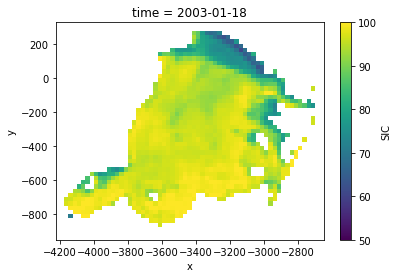

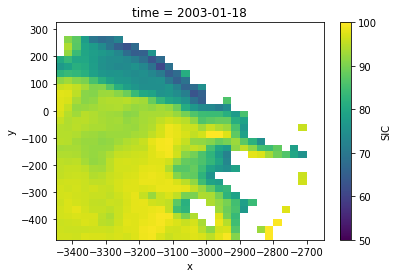

In [67]:
i = 231
ds.SIC.isel(time=i).plot(vmin=50, vmax=100)
plt.show()
ds_crop.SIC.isel(time=i).plot(vmin=50, vmax=100)
plt.show()

In [93]:
import geopandas as gpd

gdf = gpd.GeoDataFrame({
'Churchill': [58.77, -94.17],
'Arviat': [61.10, -94.06],
'Quaqtaq': [61.04, -69.64],
'Inukjuak': [58.45, -78.5],
'Kuujjuarapik': [55.26, -78.0],
'Igloolik': [69.37, -81.82],
'Ungava': [58.6,-67.00],
})

gdf = gdf.T
gdf.geometry = gpd.points_from_xy(gdf[1], gdf[0])
gdf = gdf.reset_index().drop([0, 1], axis=1).rename({'index': 'Name'}, axis=1)

In [92]:
gdf.to_file('ports.geojson')

/Users/Zach/miniforge3/lib/python3.9/site-packages/geopandas/io/file.py:362: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  pd.Int64Index,
